<a href="https://colab.research.google.com/github/EduardoGSBP/data_science/blob/main/C%C3%B3pia_de_%5BTemplate%5D_Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

##Projeto Eduardo Gabriel

---

# Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<p align=center>
<img src="https://images.unsplash.com/photo-1592772874383-d08932d29db7?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=699&q=80" width="60%"></p>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*.

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$

<p align=center>
<img src="https://images.unsplash.com/photo-1620714223084-8fcacc6dfd8d?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [107]:

# instalar a biblioteca scikit-plot
!pip install -q scikit-plot
!pip install imbalanced-learn

In [108]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, recall_score,  roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

Para facilitar a aquisição dos dados, criei um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [109]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

## Análise Exploratória



In [110]:
#INFORMAÇÕES DOS ATRIBUTOS
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [111]:
#VIZUALIZAR LINHAS
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [112]:
#verificar valores ausentes
#linhas duplas
df.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [113]:
#descrição do data set
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


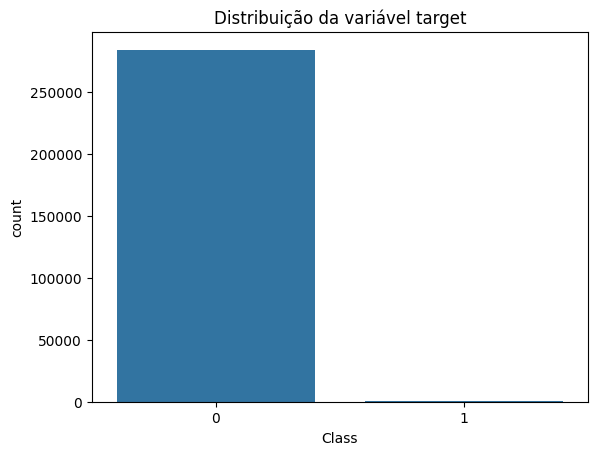

In [114]:
#grafico de barras para verificar balanceamento do data set

sns.countplot(x='Class', data=df)
plt.title('Distribuição da variável target')
plt.show()

O gráfico mostra a quantidade de transações de cada classe (Class):

Classe 0 (normal)

Classe 1 (fraude)

Ele evidencia o desbalanceamento do dataset, onde há muito mais transações normais do que fraudulentas.
________________________________________________________________________________

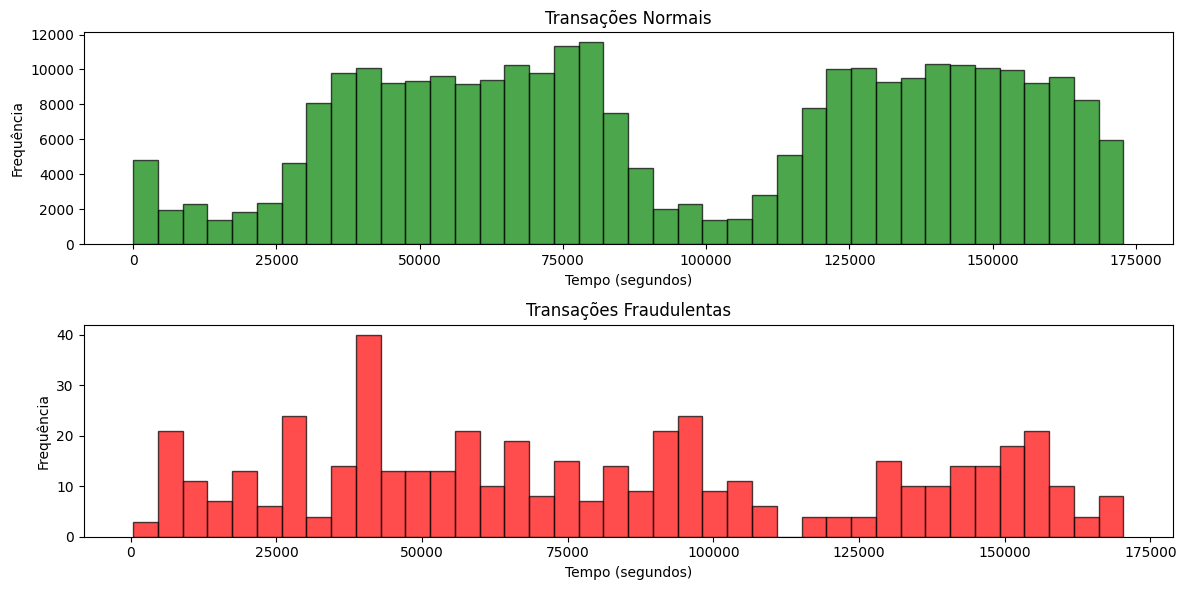

In [115]:
#plotar um histograma variavel time e amount
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

num_bins = 40

# Histograma para transações normais (barras verdes com contorno preto)
ax[0].hist(df.Time[df.Class == 0], bins=num_bins, color='green', alpha=0.7, edgecolor='black')
ax[0].set_title('Transações Normais')
ax[0].set_xlabel('Tempo (segundos)')
ax[0].set_ylabel('Frequência')

# Histograma para transações fraudulentas (barras vermelhas com contorno preto)
ax[1].hist(df.Time[df.Class == 1], bins=num_bins, color='red', alpha=0.7, edgecolor='black')
ax[1].set_title('Transações Fraudulentas')
ax[1].set_xlabel('Tempo (segundos)')
ax[1].set_ylabel('Frequência')

# Ajustar o layout para não sobrepor títulos e rótulos
plt.tight_layout()
plt.show()

O gráfico mostra a distribuição do tempo (Time) das transações normais (verde) e fraudulentas (vermelho).
Cada histograma indica em quais intervalos de tempo as transações ocorrem com mais frequência, ajudando a identificar padrões temporais diferentes entre elas.
________________________________________________________________________________

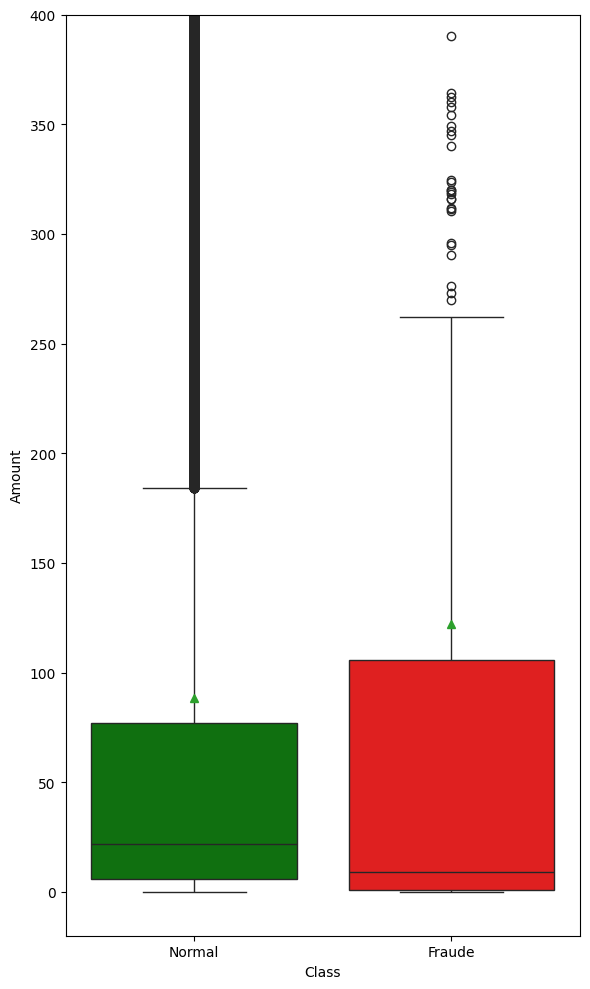

In [116]:
#crianco um blox plot para a variável Amount quando houve fraude (Class == 1)
df['Class'] = df['Class'].astype(str)

sns.boxplot(x='Class', y='Amount', data=df, showmeans=True, palette={'0':'green', '1':'red'})
plt.ylim(-20, 400)
plt.xticks([0,1], ['Normal','Fraude'])
plt.gcf().set_size_inches(6,10)
plt.tight_layout()
plt.show()


O boxplot compara os valores das transações normais (verde) e fraudulentas (vermelho).
Mostra que as fraudes geralmente têm valores maiores e mais dispersos, enquanto as transações normais são mais concentradas em valores menores.
Isso indica que o valor da transação pode ajudar a identificar fraudes.
_______________________________________________________________________________

##Dividir entre conjuntos de Treino e Validação

In [117]:
# separar variáveis entre X e y
X = df_clean.drop('Class', axis=1)
y = df['Class']

# dividir o dataset entre treino e teste
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, shuffle=True)

##Balanceamento dos dados

Class
0    369
1    369
Name: count, dtype: int64


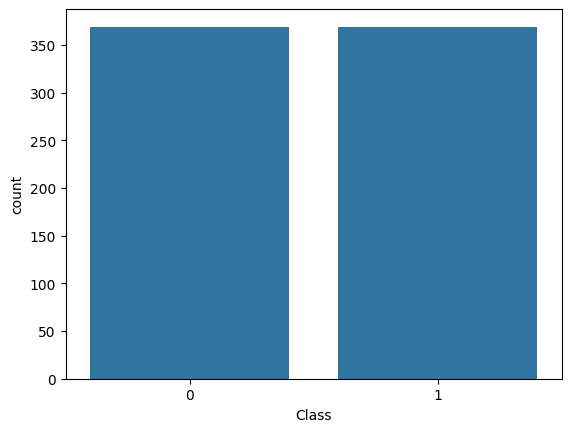

In [118]:
# usar técnica under-sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# ver o balanceamento das classes
print(pd.Series(y_rus).value_counts())

# plotar a nova distribuição de classes
sns.countplot(x=y_rus);

Após o balanceamento dos dados, a matriz de correlação passa a revelar relações mais claras entre as variáveis.
Antes disso, com o conjunto desbalanceado, praticamente não era possível extrair insights relevantes — os dados estavam muito enviesados.
Agora, com as classes equilibradas, é possível identificar com mais precisão quais variáveis possuem maior correlação entre si, o que pode ser bastante útil para entender o comportamento dos dados e melhorar os modelos preditivos.

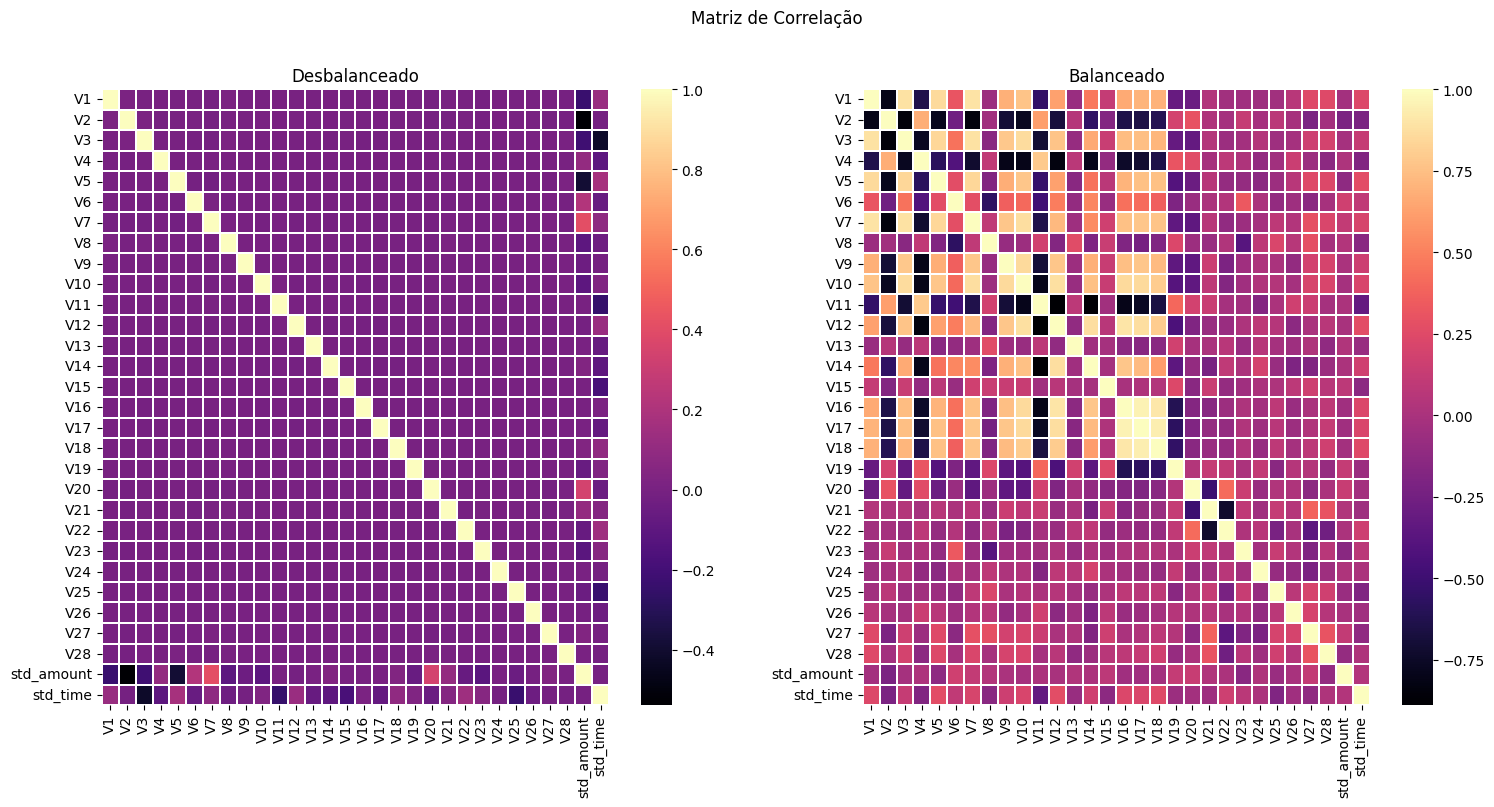

In [119]:

corr = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()


fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18,8))
fig.suptitle('Matriz de Correlação')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="magma", ax=ax[0])
ax[0].set_title('Desbalanceado')

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="magma", ax=ax[1])
ax[1].set_title('Balanceado')

plt.show()


As matrizes de correlação comparam as relações entre variáveis antes e depois do balanceamento dos dados.

A matriz da esquerda mostra os dados originais (desbalanceados).

A da direita usa dados balanceados com RandomUnderSampler.

Cada célula indica a força da relação entre duas variáveis:

+1: correlação positiva forte

-1: correlação negativa forte

0: sem correlação

Esse tipo de análise ajuda a:

Identificar variáveis redundantes

Entender como o balanceamento afeta os dados

Avaliar quais variáveis são mais relevantes para detecção de fraudes.
________________________________________________________________________________

## Preparação dos Dados



In [120]:
# 1. Copiar o DataFrame original
df_clean = df.copy()

std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# ver as primeiras entradas
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


O código padronizou as colunas Time e Amount, removendo as originais. Depois, separou os dados em variáveis preditoras e alvo, e aplicou um método para balancear as classes, igualando o número de exemplos entre transações normais e fraudulentas.
________________________________________________________________________________

## Modelo de Machine Learning


In [121]:
# instanciar e treinar um modelo de Regressão Logística
np.random.seed(2)
model = LogisticRegression()
model.fit(X_rus, y_rus)

# fazer as previsões em cima dos dados de teste
y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)

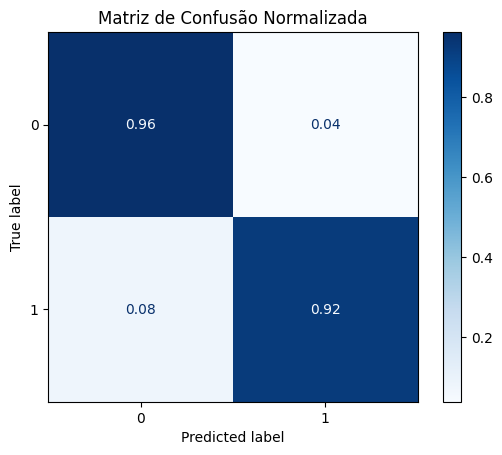

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9617    0.9804     71079
           1     0.0398    0.9187    0.0764       123

    accuracy                         0.9616     71202
   macro avg     0.5198    0.9402    0.5284     71202
weighted avg     0.9982    0.9616    0.9788     71202

Acurácia: 0.9616
AUC (ROC): 0.9727


In [122]:

# 1. Gerar predições de classes e probabilidades
y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)[:, 1]  # Probabilidades da classe positiva

# 2. Matriz de confusão normalizada
cm = confusion_matrix(y_val, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues", values_format=".2f")
plt.title("Matriz de Confusão Normalizada")
plt.show()

# 3. Relatório de Classificação
print("Relatório de Classificação:\n", classification_report(y_val, y_pred, digits=4))

# 4. Acurácia
print("Acurácia: {:.4f}".format(accuracy_score(y_val, y_pred)))

# 5. AUC (Área sob a curva ROC)
roc_auc = roc_auc_score(y_val, y_proba)
print("AUC (ROC): {:.4f}".format(roc_auc))

## Avaliar o desempenho do modelo



Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9617    0.9804    284315
           1     0.0404    0.9309    0.0774       492

    accuracy                         0.9617    284807
   macro avg     0.5201    0.9463    0.5289    284807
weighted avg     0.9982    0.9617    0.9789    284807

Acurácia: 0.9617
AUC (ROC): 0.9848


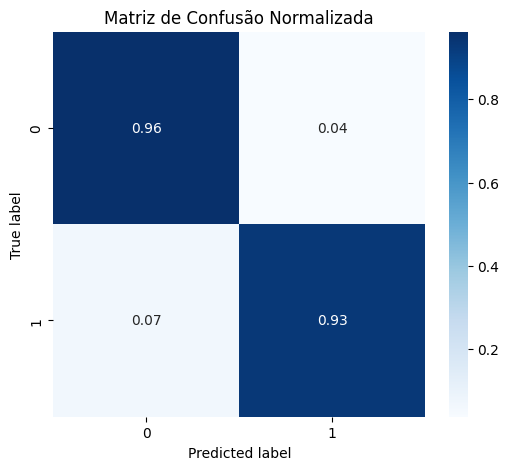

In [123]:


# Fazer predições
y_pred = model.predict(df_clean.drop("Class", axis=1))
y_proba = model.predict_proba(df_clean.drop("Class", axis=1))[:, 1]

# Métricas
print("Relatório de Classificação:\n", classification_report(df_clean['Class'], y_pred, digits=4))
print("Acurácia: {:.4f}".format(accuracy_score(df_clean['Class'], y_pred)))
print("AUC (ROC): {:.4f}".format(roc_auc_score(df_clean['Class'], y_proba)))

# Matriz de confusão
conf_matrix = confusion_matrix(df_clean['Class'], y_pred, normalize='true')
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Matriz de Confusão Normalizada")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

Podemos ver que nossos resultados foram marginalmente inferiores ao do conjunto de validação, o que é um excelente resultado!

##✅ Conclusão
Como você pode observar, não se trata de um problema trivial. Mesmo com os dados bem tratados e sem valores ausentes, o forte desbalanceamento entre as classes exigiu cuidados extras no pré-processamento e na avaliação do modelo.

Apesar desses desafios, o modelo apresentou um desempenho bastante satisfatório, com destaque para o recall e a AUC — métricas essenciais quando o objetivo é identificar fraudes com o menor número possível de falsos negativos.

Ainda assim, há espaço para melhorias. Testar outros algoritmos de classificação, ajustar hiperparâmetros e aplicar técnicas de balanceamento mais avançadas podem contribuir para tornar a detecção de fraudes ainda mais eficaz.

